In [ ]:
pip install numpy
pip install pandas
pip install matplotlib
pip install opencv-python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2


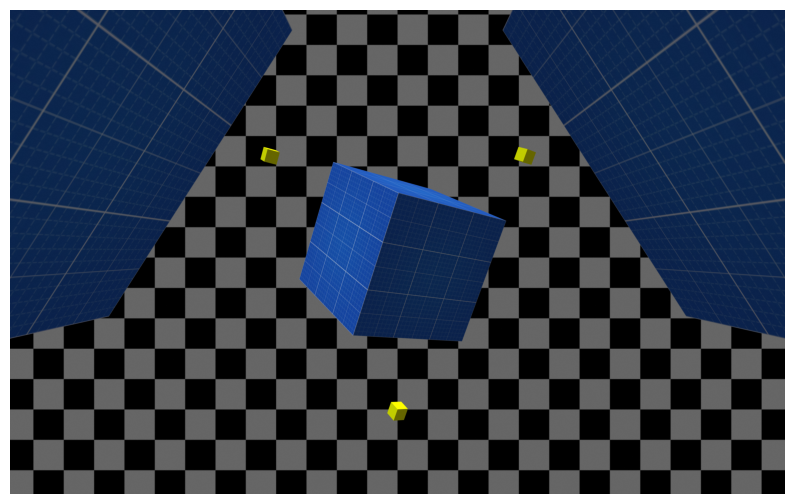

In [6]:
color_cv = np.load('last_color.npy')

color_cv = color_cv[..., ::-1]

plt.figure(figsize=(10, 8))
plt.imshow(color_cv)
plt.axis('off')
plt.show()

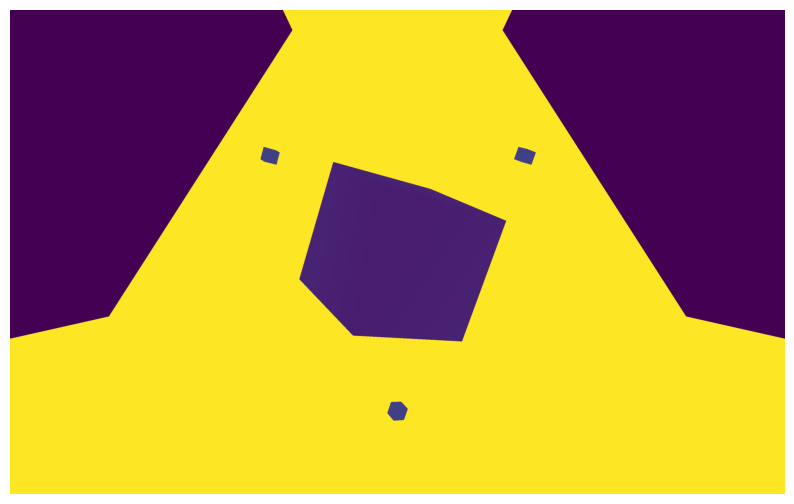

In [3]:
depth_cv = np.load('last_depth.npy')

depth_cv[np.isnan(depth_cv)] = 0

plt.figure(figsize=(10, 8))
plt.imshow(depth_cv)
plt.axis('off')
plt.show()

In [ ]:
depth_normalized = (depth_cv - depth_cv.min()) / (depth_cv.max() - depth_cv.min())

focus_distance = 2.1 / 21

depth_normalized = (depth_cv - depth_cv.min()) / (depth_cv.max() - depth_cv.min())

blur_strength = depth_normalized - focus_distance

negative_mask = blur_strength < - (1 / 21)
positive_mask = blur_strength >= 0

blur_strength[negative_mask] = np.abs(blur_strength[negative_mask]) * 100
blur_strength[positive_mask] = blur_strength[positive_mask] * 200

# blur_strength = np.clip(blur_strength, 0, 1)
blur_strength = np.clip(blur_strength * 50, 0, 1)

blurred_img = cv2.GaussianBlur(color_cv, (51, 51), 0)
out = (1 - blur_strength[:, :, np.newaxis]) * color_cv + blur_strength[:, :, np.newaxis] * blurred_img
out = out.astype(np.uint8)

# Сравнение изображений
plt.figure(figsize=(25, 10))

# Оригинальное изображение
plt.subplot(2, 1, 1)
plt.imshow(cv2.cvtColor(color_cv, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2, 1, 2)
plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()

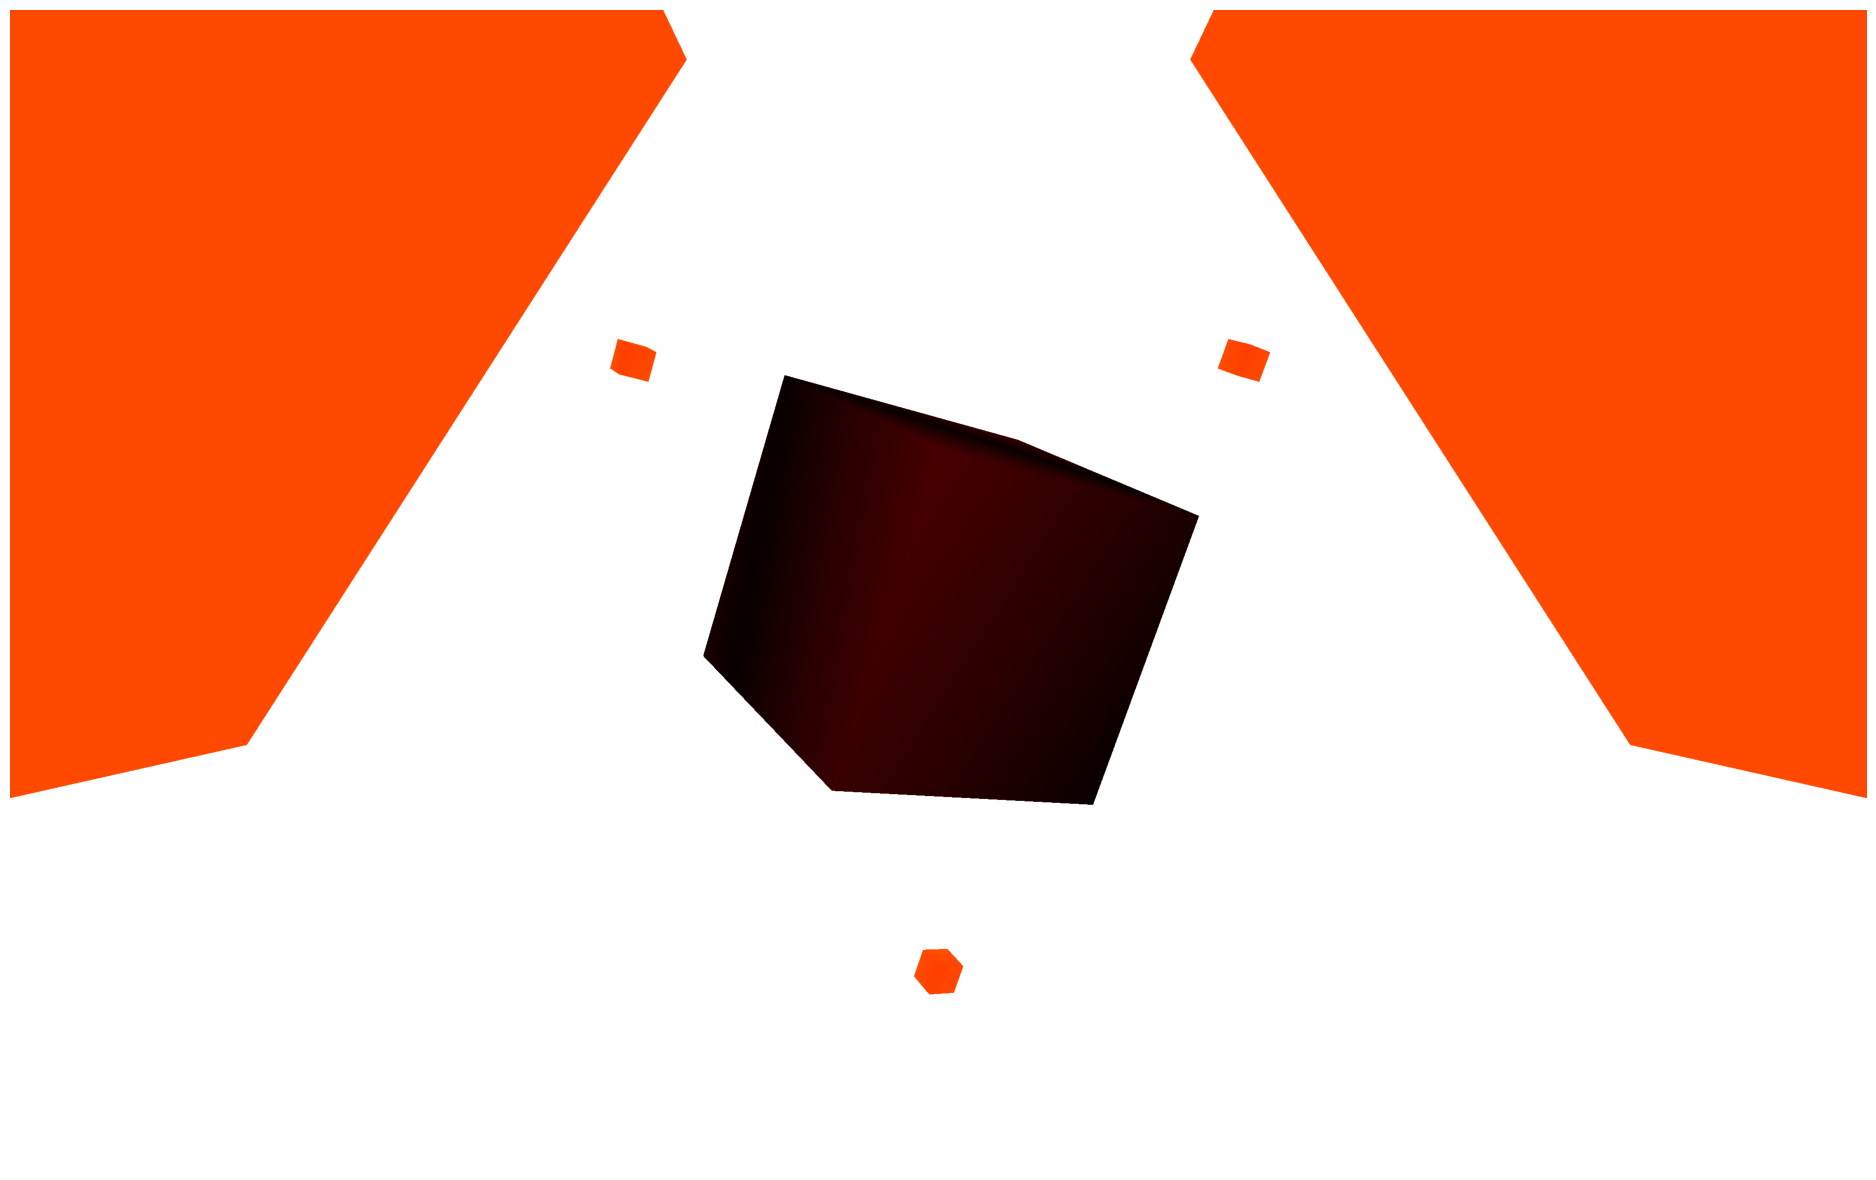

In [5]:
focus_distance = 2

depth_normalized = (depth_cv - depth_cv.min()) / (depth_cv.max() - depth_cv.min())
focus_distance_norm = focus_distance / 21

blur_strength = np.abs(depth_normalized - focus_distance_norm)
blur_strength = np.clip(blur_strength * 5, 0, 1)

plt.figure(figsize=(75, 25))

plt.subplot(1, 4, 4)
plt.imshow(blur_strength, cmap='hot')
plt.axis('off')

plt.tight_layout()
plt.show()